In [1]:
import pandas as pd

## 1. Load the data

In [6]:
california_data = pd.read_excel('1553768847_housing.xlsx')

In [7]:
california_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [8]:
california_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [9]:
california_data.shape

(20640, 10)

In [10]:
X = california_data.drop(columns='median_house_value', axis =1)
print(X.shape)
print(X.columns)

(20640, 9)
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')


In [11]:
y = california_data['median_house_value']
y.shape

(20640,)

## 2. Handling missing values

In [14]:
california_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [16]:
california_data['total_bedrooms'].fillna(value=california_data.total_bedrooms.mean(),inplace=True)

In [17]:
california_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

## 3.Encode categorical data

In [19]:
california_data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [20]:
california_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [21]:
california_data = pd.get_dummies(california_data)
california_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [22]:
print("The name of the columns available in the dataset are ", '\n', california_data.columns)
print("--------------------------------------------------------------------------")
print("Shape of the dataset after encoding the categorical variables is:",'\n', california_data.shape)

The name of the columns available in the dataset are  
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')
--------------------------------------------------------------------------
Shape of the dataset after encoding the categorical variables is: 
 (20640, 14)


In [23]:
X = california_data.drop(columns='median_house_value', axis =1)
y = california_data['median_house_value']

## 4. Split the dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.2)

In [25]:
print("The shape of the train features is:", '\n' , X_train.shape)
print("The shape of the test features is:", '\n' , X_test.shape)
print("The shape of the train target column is:", '\n' , y_train.shape)
print("The shape of the test target column is:", '\n' , y_test.shape)

The shape of the train features is: 
 (16512, 13)
The shape of the test features is: 
 (4128, 13)
The shape of the train target column is: 
 (16512,)
The shape of the test target column is: 
 (4128,)


## 5. Standardize data

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
X_train.shape

(16512, 13)

## 6. Perform Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred = lin_reg.predict(X_test)

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test,y_pred)))

69730.94707062806


## 7. Perform Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor() 

In [33]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [34]:
y_pred = dt.predict(X_test)
import numpy as np
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test,y_pred)))

75217.0701374448


## 8. Perform Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
y_pred = forest.predict(X_test)

In [37]:
import numpy as np
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test,y_pred)))

55071.00964944661


## 9. Perform Linear Regression with one independent variable

In [40]:
# build a simple linear regression model with only one input, i.e the Median Income feature
X_new_train = X_train[:,7]
X_new_test = X_test[:,7]
X_new_train = X_new_train.reshape(-1,1)
X_new_test = X_new_test.reshape(-1,1)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
simple_lin_reg = LinearRegression()
simple_lin_reg.fit(X_new_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred = simple_lin_reg.predict(X_new_test)

In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test,y_pred)))

84726.51752750174


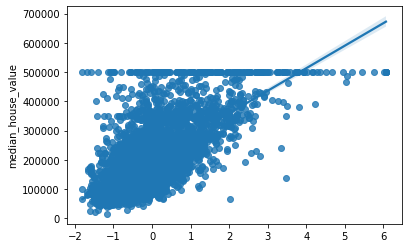

In [45]:
import seaborn as sns
ax = sns.regplot(X_new_test,y_test)